## **Submission By: Anish Dhane**


<h1>Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,r2_score, mean_squared_error, accuracy_score, precision_score, roc_curve, precision_recall_curve, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.ensemble import GradientBoostingClassifier



<h1>Loading Dataset

In [5]:
cp_data = pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [6]:
cp_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [7]:
cp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


<h1>Checking for null values

In [8]:
cp_data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [9]:
cp_data.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

<h1> Outlier Detection

In [10]:
cp_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


<h4> Here we can see, the mean and median(50%) values are the same for every feature, so we do not have any outlier present. However I will plot the features to ensure the same.

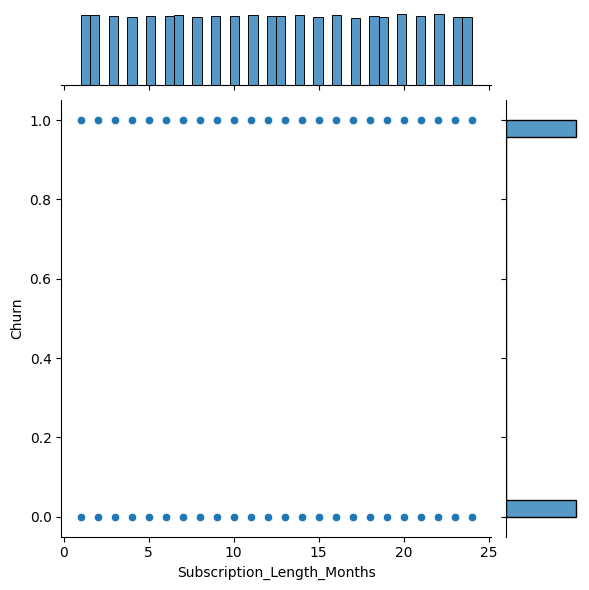

In [11]:
sb.jointplot(x="Subscription_Length_Months", y="Churn", data=cp_data)

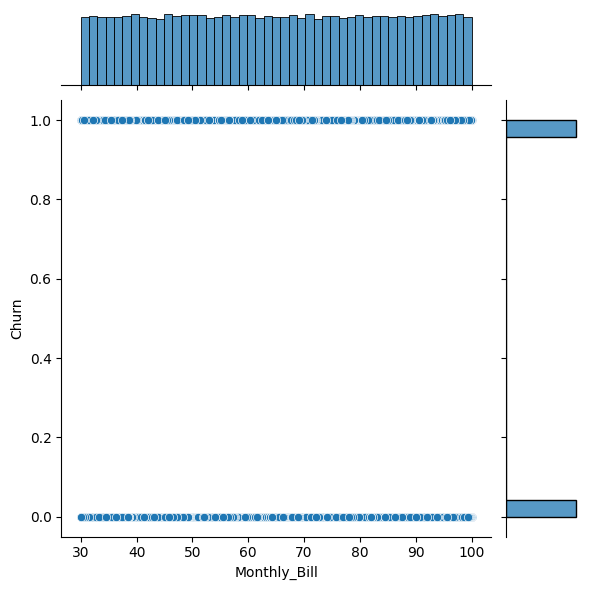

In [12]:
sb.jointplot(x="Monthly_Bill", y="Churn", data=cp_data)

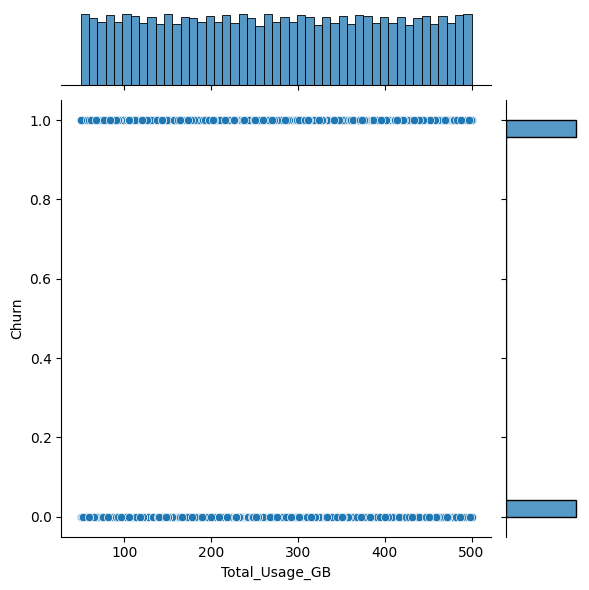

In [13]:
sb.jointplot(x="Total_Usage_GB", y="Churn", data=cp_data)

<h4> By analysing the figures we can infer that the data does not have any outliers

<h1> Encoding categorical values to numerical values

In [14]:
cp_data =cp_data.drop(['Name', 'CustomerID'] ,axis=1)


In [15]:
cp_data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [16]:
cp_data = pd.get_dummies(cp_data)

In [17]:
del cp_data['Gender_Female']

In [18]:
cp_data

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,1,0,1,0,0,0
99996,62,19,61.65,351,0,0,0,0,0,0,1
99997,64,17,96.11,251,1,1,1,0,0,0,0
99998,51,20,49.25,434,1,0,0,0,0,0,1


In [19]:
cp_data['Total_Bill'] = cp_data['Subscription_Length_Months'] * cp_data['Monthly_Bill']

In [20]:
cp_data['Cost_per_GB'] = cp_data['Total_Bill'] / cp_data['Total_Usage_GB']

In [21]:
del cp_data['Monthly_Bill']

In [22]:
cp_data

,Age,Subscription_Length_Months,Total_Usage_GB,Churn,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Total_Bill,Cost_per_GB
0,63,17,236,0,1,0,0,1,0,0,1247.12,5.284407
1,62,1,172,0,0,0,0,0,0,1,48.76,0.283488
2,24,5,460,0,0,0,0,1,0,0,427.35,0.929022
3,36,3,297,1,0,0,0,0,1,0,293.82,0.989293
4,46,19,266,0,0,0,0,0,1,0,1104.66,4.152857
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,23,226,1,1,0,1,0,0,0,1267.99,5.610575
99996,62,19,351,0,0,0,0,0,0,1,1171.35,3.337179
99997,64,17,251,1,1,1,0,0,0,0,1633.87,6.509442
99998,51,20,434,1,0,0,0,0,0,1,985.00,2.269585


<h1>Declaring Dependent and Independent variable

In [24]:
X =cp_data.drop(['Churn'],axis=1)
y = cp_data['Churn']
print(X.shape)
print(y.shape)

(100000, 11)
(100000,)


<h1>Standardization

In [25]:
scale = StandardScaler()

X[['Subscription_Length_Months','Total_Usage_GB','Total_Bill','Cost_per_GB']] = scale.fit_transform(X[['Subscription_Length_Months','Total_Usage_GB','Total_Bill','Cost_per_GB']])
X


,Age,Subscription_Length_Months,Total_Usage_GB,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Total_Bill,Cost_per_GB
0,63,0.651115,-0.294289,1,0,0,1,0,0,0.815465,0.241860
1,62,-1.658879,-0.784852,0,0,0,0,0,1,-1.429260,-0.852631
2,24,-1.081380,1.422681,0,0,0,1,0,0,-0.720099,-0.711350
3,36,-1.370129,0.173279,0,0,0,0,1,0,-0.970222,-0.698160
4,46,0.939864,-0.064338,0,0,0,0,1,0,0.548614,-0.005789
...,...,...,...,...,...,...,...,...,...,...,...
99995,33,1.517363,-0.370939,1,0,1,0,0,0,0.854558,0.313244
99996,62,0.939864,0.587191,0,0,0,0,0,1,0.673535,-0.184306
99997,64,0.651115,-0.179313,1,1,0,0,0,0,1.539911,0.509968
99998,51,1.084239,1.223390,0,0,0,0,0,1,0.324471,-0.417958


<h1> Model building and fine-tuning

In [36]:
def stratified_cv(X, y, clf_class, shuffle=True,  **kwargs):
    stratified_k_fold = StratifiedKFold().split(X,y)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        Xtrain, Xtest = X.iloc[ii], X.iloc[jj]
        ytrain = y.iloc[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred.iloc[jj] = clf.predict(Xtest)
    return y_pred

In [55]:
print('Random Forest Classifier:      {:.2f}'.format(
    accuracy_score(y, stratified_cv(X, y, RandomForestClassifier))))

print('XGBoost Classifier:           {:.2f}'.format(
    accuracy_score(y, stratified_cv(X, y, XGBClassifier))))

print('Logistic Regression:           {:.2f}'.format(
    accuracy_score(y, stratified_cv(X, y, LogisticRegression))))

Random Forest Classifier:      0.85
XGBoost Classifier:           0.60
Logistic Regression:           0.50


<h4> We can clearly see that RFC gives out better performance. Lets plot this.

<h1>RFC

RFC Confusion matrix


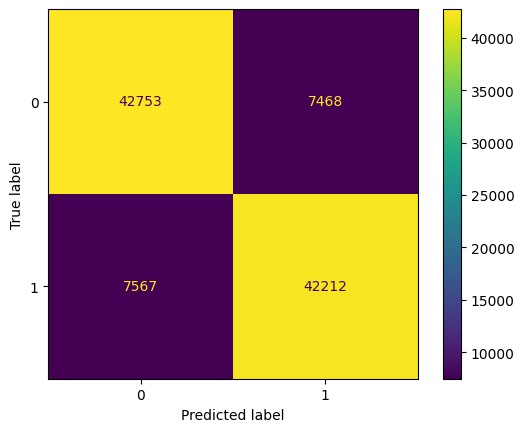

In [63]:
rf_conf_matrix  = confusion_matrix(y, stratified_cv(X, y, RandomForestClassifier,n_estimators=113))
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix)
print('RFC Confusion matrix')
disp.plot()
plt.show()


<h1> ROC Curve

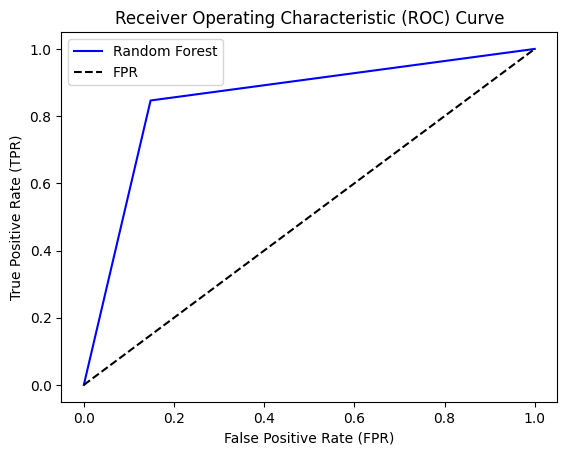

In [64]:
fpr1, tpr1, thresholds2 = roc_curve(y, stratified_cv(X, y, RandomForestClassifier,n_estimators=113))
plt.plot(fpr1, tpr1, label='Random Forest', color = 'blue')



plt.plot([0, 1], [0, 1], 'k--', label='FPR')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<h1>XgBoost

XGB Confusion matrix


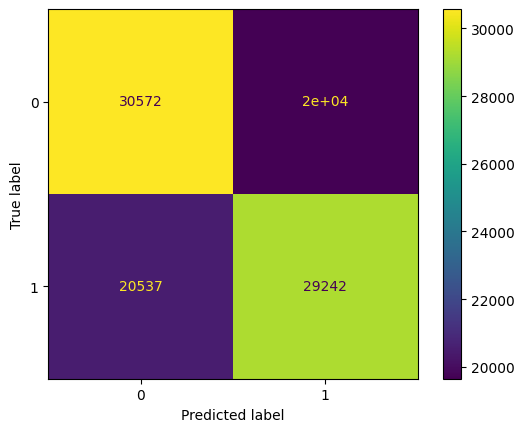

In [71]:
xgb_conf_matrix  = confusion_matrix(y, stratified_cv(X, y, XGBClassifier))
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix)
print('XGB Confusion matrix')
disp.plot()
plt.show()

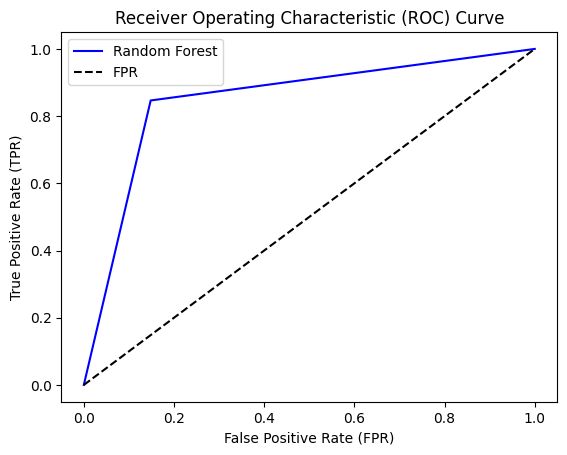

In [72]:
fpr2, tpr2, thresholds2 = roc_curve(y, stratified_cv(X, y, RandomForestClassifier,n_estimators=113))
plt.plot(fpr2, tpr2, label='Random Forest', color = 'blue')



plt.plot([0, 1], [0, 1], 'k--', label='FPR')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<h4> We will now save and deploy our model, we choose RandomForest.

In [79]:
stratified_k_fold = StratifiedKFold().split(X,y)
y_pred = y.copy()
for ii, jj in stratified_k_fold:
        Xtrain, Xtest = X.iloc[ii], X.iloc[jj]
        ytrain = y.iloc[ii]
        clf = RandomForestClassifier()
        f_model = clf.fit(X_train,y_train)

In [84]:
import pickle

pickle.dump(f_model, open('CPModel.sav', 'wb'))